<a href="https://colab.research.google.com/github/aimldlnlp/Data-Analysis-Project-Dicoding/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project: Bike-sharing-dataset
- **Name:** Zinadine Zidan Alsyahana
- **Email:** m180b4ky4627@bangkit.academy
- **ID Dicoding:** pengenjago_ai

## Defining the Business Questions

- What are the key factors influencing the total daily bike rentals?
- How do bike rental patterns vary throughout the day, and what are the peak hours for rentals?
- What is the impact of working days and holidays on bike rentals?

## Import All Packages/Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

## Data Wrangling

###Load the Datasets

In [2]:
# Load the datasets
df_day = pd.read_csv('/content/day.csv')
df_hour = pd.read_csv('/content/hour.csv')

# Display the first few rows of each dataset
print("Day Dataset:")
print(df_day.head(), "\n")

print("Hour Dataset:")
print(df_hour.head())

Day Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Hour Datase

###Explore the Datasets

In [3]:
# Basic information and summary statistics
print("Day Dataset Info:")
print(df_day.info(), "\n")

Day Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None 



In [4]:
print("Day Dataset Summary:")
print(df_day.describe(), "\n")

Day Dataset Summary:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std   

In [5]:
print("Hour Dataset Info:")
print(df_hour.info(), "\n")

Hour Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None 



In [6]:
print("Hour Dataset Summary:")
print(df_hour.describe())

Hour Dataset Summary:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431

In [7]:
# Check for missing values
print("\nMissing values in day dataset:")
print(df_day.isnull().sum())


Missing values in day dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
print("\nMissing values in hour dataset:")
print(df_hour.isnull().sum())


Missing values in hour dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


###Clean the Data

In [9]:
# Check for duplicate rows
print("\nDuplicate rows in day dataset:", df_day.duplicated().sum())
print("Duplicate rows in hour dataset:", df_hour.duplicated().sum())


Duplicate rows in day dataset: 0
Duplicate rows in hour dataset: 0


In [10]:
# Drop duplicates if found
df_day = df_day.drop_duplicates()
df_hour = df_hour.drop_duplicates()

In [11]:
# Scale back normalized columns to their actual values
df_day['temp_actual'] = df_day['temp'] * 41
df_day['atemp_actual'] = df_day['atemp'] * 50
df_day['hum_actual'] = df_day['hum'] * 100
df_day['windspeed_actual'] = df_day['windspeed'] * 67

df_hour['temp_actual'] = df_hour['temp'] * 41
df_hour['atemp_actual'] = df_hour['atemp'] * 50
df_hour['hum_actual'] = df_hour['hum'] * 100
df_hour['windspeed_actual'] = df_hour['windspeed'] * 67

In [12]:
# Ensure date columns are datetime type for easier analysis
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [13]:
# Drop unnecessary columns
df_day = df_day.drop(columns=['instant'])
df_hour = df_hour.drop(columns=['instant'])

In [14]:
# Confirm cleaning steps
print("\nDay Dataset after cleaning:")
print(df_day.head(), "\n")

print("Hour Dataset after cleaning:")
print(df_hour.head())


Day Dataset after cleaning:
      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1        0        6           0           2   
1 2011-01-02       1   0     1        0        0           0           2   
2 2011-01-03       1   0     1        0        1           1           1   
3 2011-01-04       1   0     1        0        2           1           1   
4 2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  \
0  0.344167  0.363625  0.805833   0.160446     331         654   985   
1  0.363478  0.353739  0.696087   0.248539     131         670   801   
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349   
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562   
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600   

   temp_actual  atemp_actual  hum_actual  windspeed_actual  
0    14.110847      

## Exploratory Data Analysis (EDA)

### Exploring Weather Factors Affecting Bike Rentals

In [15]:
df_day['temp_bin'] = (df_day['temp_actual']).round()
df_day['atemp_bin'] = (df_day['atemp_actual']).round()
df_day['hum_bin'] = (df_day['hum_actual']).round()
df_day['windspeed_bin'] = (df_day['windspeed_actual']).round()

temp_avg_cnt = df_day.groupby('temp_bin')['cnt'].mean().reset_index()
atemp_avg_cnt = df_day.groupby('atemp_bin')['cnt'].mean().reset_index()
hum_avg_cnt = df_day.groupby('hum_bin')['cnt'].mean().reset_index()
windspeed_avg_cnt = df_day.groupby('windspeed_bin')['cnt'].mean().reset_index()

#### Explore Windspeed

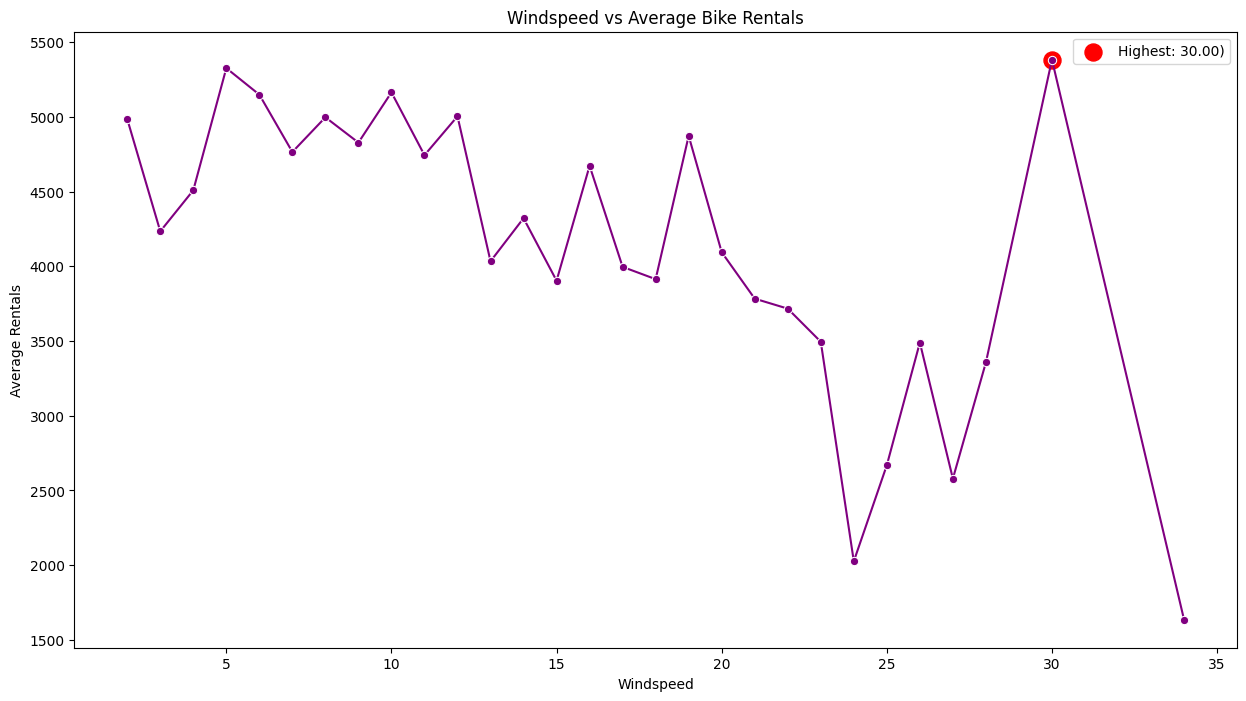

In [16]:
# Find the bin with the highest average bike rentals
highest_windspeed = windspeed_avg_cnt[windspeed_avg_cnt['cnt'] == windspeed_avg_cnt['cnt'].max()]

# Plot the lineplot
plt.figure(figsize=(15, 8))
sns.lineplot(x='windspeed_bin', y='cnt', data=windspeed_avg_cnt, marker='o', color='purple')
plt.title('Windspeed vs Average Bike Rentals')
plt.xlabel('Windspeed')
plt.ylabel('Average Rentals')

# Highlight the maximum point
plt.scatter(
    highest_windspeed['windspeed_bin'],
    highest_windspeed['cnt'],
    color='red',
    s=150,
    label=f"Highest: {highest_windspeed['windspeed_bin'].values[0]:.2f})"
)

plt.legend()
plt.show()

#### Explore Temperature

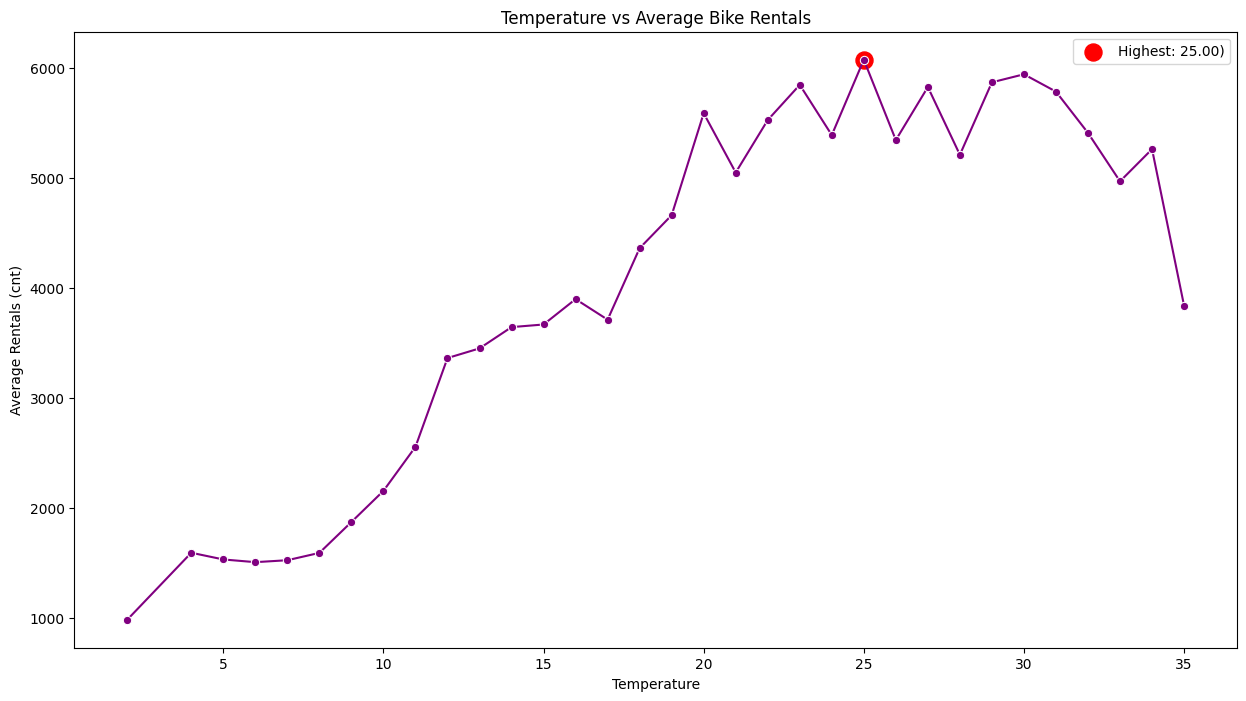

In [17]:
highest_temp = temp_avg_cnt[temp_avg_cnt['cnt'] == temp_avg_cnt['cnt'].max()]

plt.figure(figsize=(15, 8))
sns.lineplot(x='temp_bin', y='cnt', data=temp_avg_cnt, marker='o', color='purple')
plt.title('Temperature vs Average Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Average Rentals (cnt)')

plt.scatter(
    highest_temp['temp_bin'],
    highest_temp['cnt'],
    color='red',
    s=150,
    label=f"Highest: {highest_temp['temp_bin'].values[0]:.2f})"
)

plt.legend()
plt.show()

#### Insights


1. Temperature Exploration: Bike rentals increase steadily as the temperature rises from 0°C to around 20°C, **and** then plateau at higher temperatures, remaining stable up to 35°C.
2. Windspeed Exploration: The average bike rentals are lowest when the windspeed is around 25 (actual scale).

###Analyze Categorical Variables

#### Rentals by season

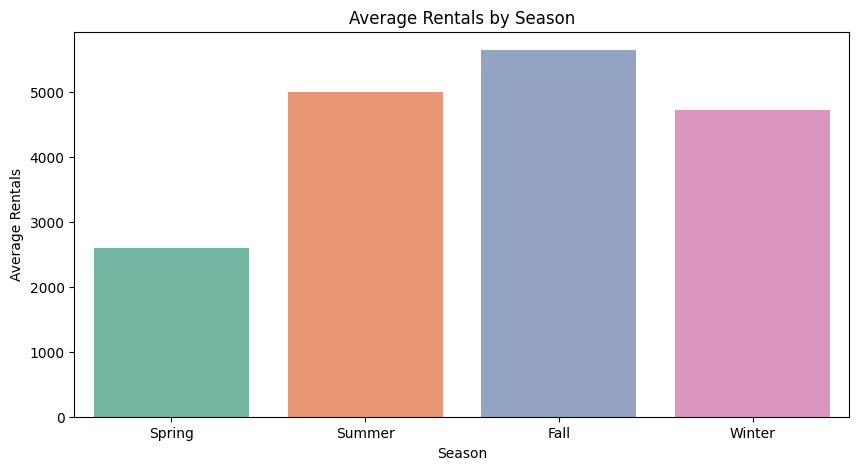

In [18]:
plt.figure(figsize=(10, 5))
season_avg_rentals = df_day.groupby('season')['cnt'].mean().reset_index()
sns.barplot(data=season_avg_rentals, x='season', y='cnt', palette='Set2')
plt.title("Average Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

#### Rentals by working day

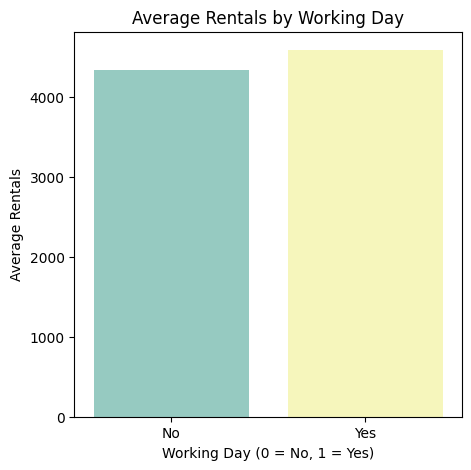

In [19]:
plt.figure(figsize=(5, 5))
workingday_avg_rentals = df_day.groupby('workingday')['cnt'].mean().reset_index()
sns.barplot(data=workingday_avg_rentals, x='workingday', y='cnt', palette='Set3')
plt.title("Average Rentals by Working Day")
plt.xlabel("Working Day (0 = No, 1 = Yes)")
plt.ylabel("Average Rentals")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

#### Rentals by weather situations

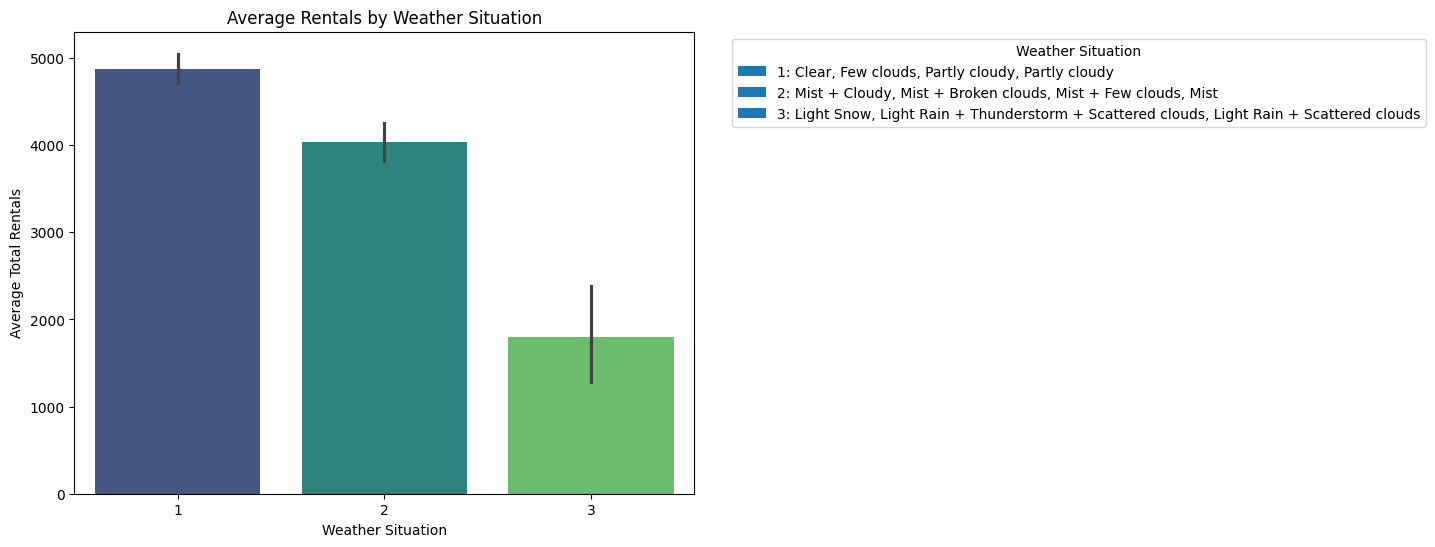

In [20]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 6))
sns.barplot(data=df_day, x='weathersit', y='cnt', palette='viridis')
plt.title("Average Rentals by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Average Total Rentals")
plt.xticks(ticks=[0, 1, 2], labels=['1', '2', '3'])

weather_legend = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
}

handles = [mpatches.Patch(label=f'{i+1}: {weather_legend[i+1]}') for i in range(3)]

plt.legend(handles=handles, title="Weather Situation", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Insights


1. **Rentals by Season**
   - The highest average rentals occur during **Fall**, followed by **Summer**, **Winter**, and **Spring**. This suggests that Fall might have favorable weather conditions, contributing to an increase in bike rentals.
2. **Rentals by Working Day**
   - The highest average rentals are observed on **working days**, suggesting that a significant portion of bike usage is for commuting purposes rather than leisure.
3. **Rentals by weather situations**
  - The bar plot shows that **weather situation 1** (Clear, Few clouds, Partly cloudy) has the highest average total rentals. This suggests that the most favorable weather conditions for bike rentals are when the weather is clear or mildly cloudy, which likely makes it more comfortable for users to rent bikes.

### Time Series Analysis

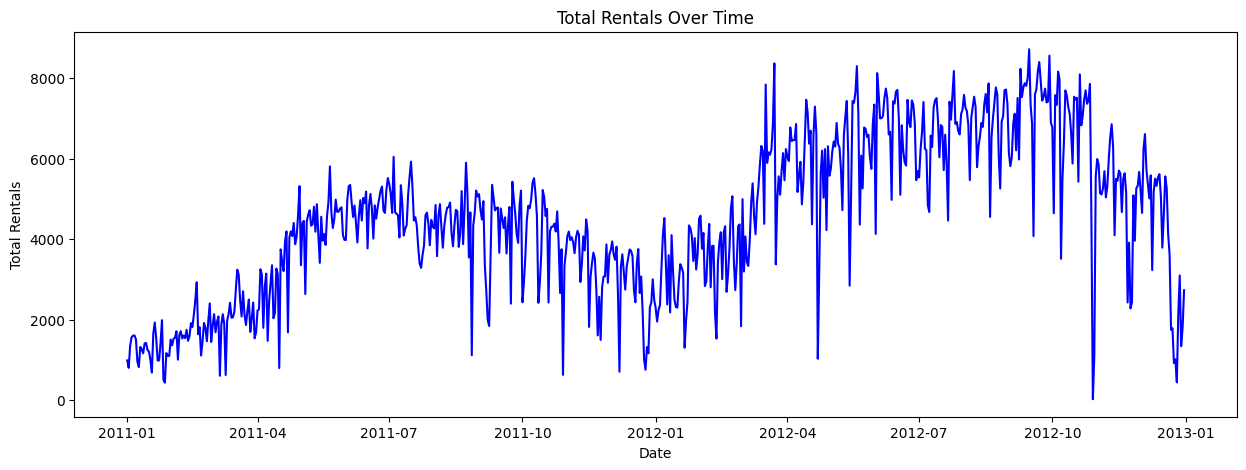

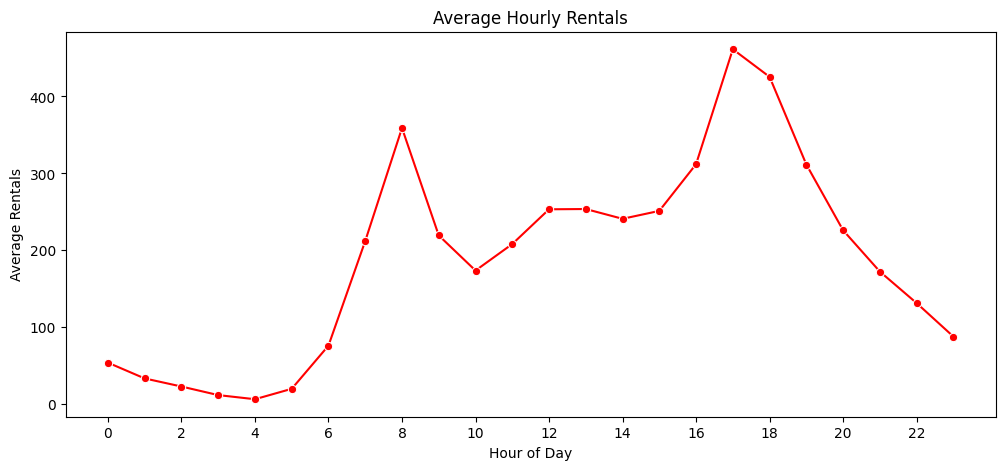

In [21]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_day, x='dteday', y='cnt', color='blue')
plt.title("Total Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hour.groupby('hr')['cnt'].mean().reset_index(), x='hr', y='cnt', marker='o', color='red')
plt.title("Average Hourly Rentals")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.xticks(ticks=range(0, 24, 2))
plt.show()

#### Insights


1. **Rentals Over Time**
  - From the line plot, it is observed that the highest bike rental activity occurred between April 2012 and October 2012. This aligns with spring and summer months, where the weather is typically more favorable for outdoor activities, including biking.
  - Seasonal trends indicate that bike rentals increase during warmer months and decrease during colder months, suggesting a strong influence of temperature and seasonality on rental behavior.

2. **Hourly Rentals Pattern**
  - The hourly rentals pattern reveals a clear peak at 17:00 (5 PM). This is likely due to people using bikes for commuting purposes during the evening rush hour.
  - Secondary peaks may also be visible during early morning hours (8:00 AM), corresponding to the morning commute.
  - During late-night and early morning hours (e.g., 1 AM to 6 AM), the number of rentals drops significantly, indicating minimal activity during these times.

## Visualization & Explanatory Analysis

### Question 1: What are the key factors influencing the total daily bike rentals?

In [22]:
df_day['temp_bin'] = (df_day['temp_actual']).round()
df_day['atemp_bin'] = (df_day['atemp_actual']).round()
df_day['hum_bin'] = (df_day['hum_actual']).round()
df_day['windspeed_bin'] = (df_day['windspeed_actual']).round()

temp_avg_cnt = df_day.groupby('temp_bin')['cnt'].mean().reset_index()
atemp_avg_cnt = df_day.groupby('atemp_bin')['cnt'].mean().reset_index()
hum_avg_cnt = df_day.groupby('hum_bin')['cnt'].mean().reset_index()
windspeed_avg_cnt = df_day.groupby('windspeed_bin')['cnt'].mean().reset_index()

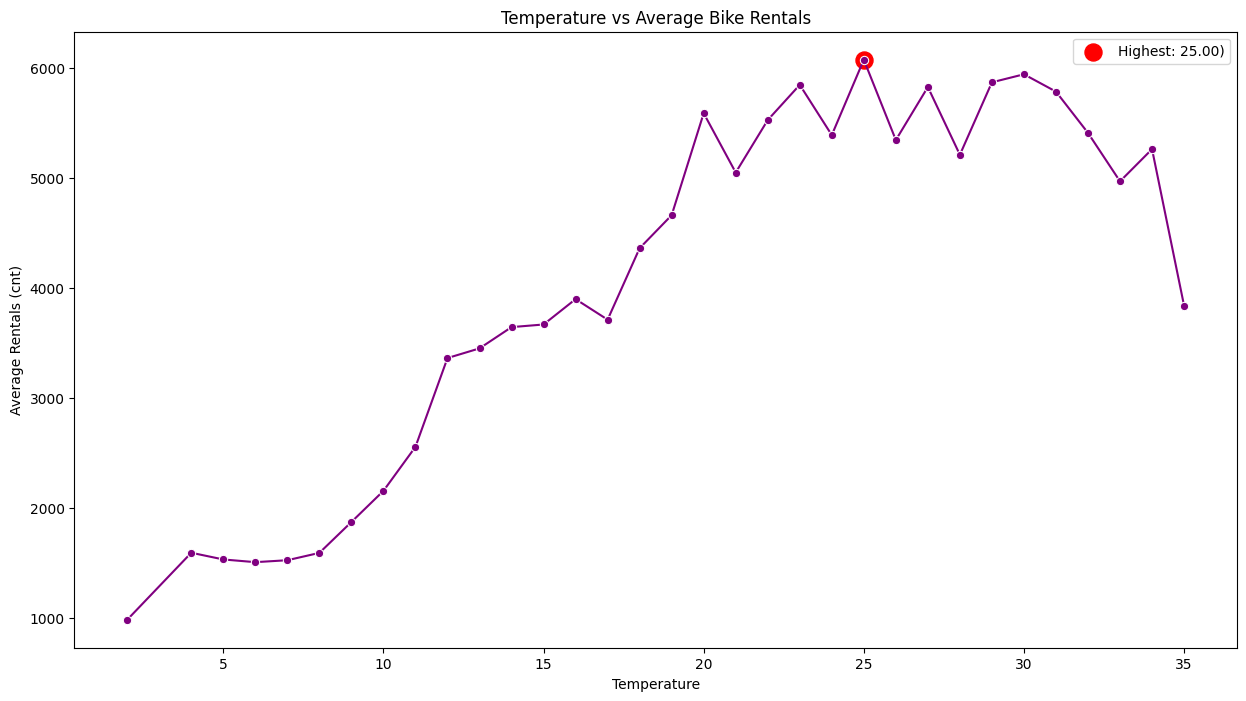

In [23]:
highest_temp = temp_avg_cnt[temp_avg_cnt['cnt'] == temp_avg_cnt['cnt'].max()]

plt.figure(figsize=(15, 8))
sns.lineplot(x='temp_bin', y='cnt', data=temp_avg_cnt, marker='o', color='purple')
plt.title('Temperature vs Average Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Average Rentals (cnt)')

plt.scatter(
    highest_temp['temp_bin'],
    highest_temp['cnt'],
    color='red',
    s=150,
    label=f"Highest: {highest_temp['temp_bin'].values[0]:.2f})"
)

plt.legend()
plt.show()

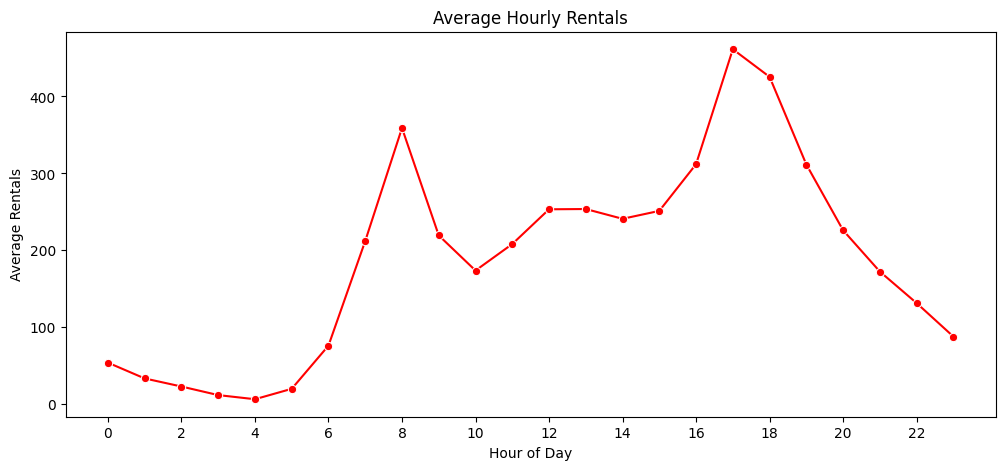

In [24]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hour.groupby('hr')['cnt'].mean().reset_index(), x='hr', y='cnt', marker='o', color='red')
plt.title("Average Hourly Rentals")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.xticks(ticks=range(0, 24, 2))
plt.show()

**Insight for Question 1:**

The total daily bike rentals are significantly influenced by temperature and hour of the day.

1. Temperature: Bike rentals steadily increase as the temperature rises from 0°C to around 20°C, indicating that warmer weather encourages biking activity. Beyond 20°C, the rentals plateau, remaining stable up to 35°C, suggesting a comfort zone for users at moderate to warm temperatures.

2. Hour of the Day: The hourly rental pattern reveals distinct peaks during the day, aligning with commuting hours. The highest rentals occur at 5 PM, likely due to evening rush-hour activities. A secondary peak is observed at 8 AM, corresponding to morning commutes. Rentals drop significantly during late-night and early-morning hours, reflecting reduced biking activity during these times.

### Question 2: How do bike rental patterns vary throughout the day, and what are the peak hours for rentals?

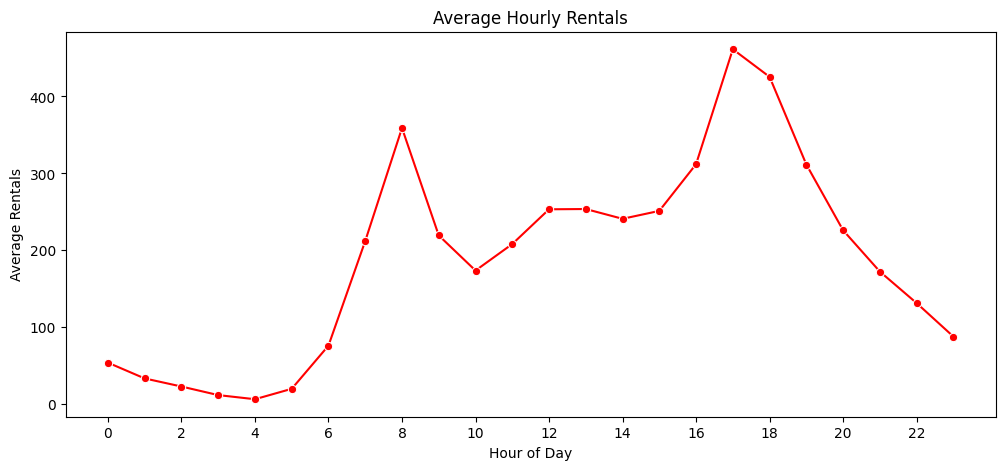

In [25]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hour.groupby('hr')['cnt'].mean().reset_index(), x='hr', y='cnt', marker='o', color='red')
plt.title("Average Hourly Rentals")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.xticks(ticks=range(0, 24, 2))
plt.show()

**Insight for Question 2:**

Bike rental patterns display distinct fluctuations throughout the day, with a pronounced peak at 17:00. This peak corresponds with the end of the typical workday, indicating that a significant number of riders utilize bike rentals for commuting home or participating in evening leisure activities. Additionally, there is a noticeable increase in rentals during the morning rush hour around 8:00, reflecting the demand for bikes as a convenient transportation option for daily commuters. Analyzing these patterns can provide valuable insights for optimizing bike availability and marketing efforts, ensuring that supply aligns with demand during these critical rental periods.

### Question 3: What is the impact of working days and holidays on bike rentals?

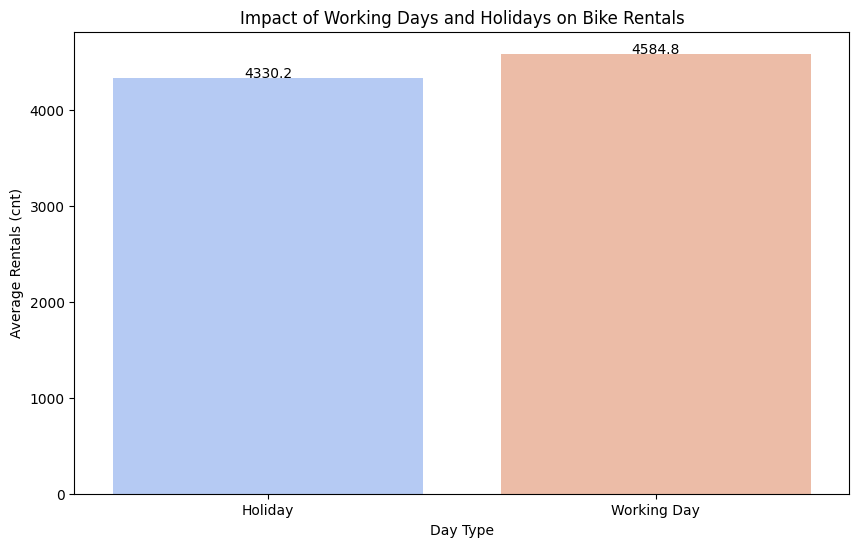

In [26]:
workingday_avg_cnt = df_day.groupby('workingday')['cnt'].mean().reset_index()
workingday_avg_cnt['workingday'] = workingday_avg_cnt['workingday'].map({0: 'Holiday', 1: 'Working Day'})

plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_avg_cnt, palette='coolwarm')
plt.title('Impact of Working Days and Holidays on Bike Rentals')
plt.xlabel('Day Type')
plt.ylabel('Average Rentals (cnt)')

for index, row in workingday_avg_cnt.iterrows():
    plt.text(x=index, y=row['cnt'] + 5, s=f"{row['cnt']:.1f}", ha='center')

plt.show()


**Insight for Question 3:**

The analysis of bike rentals reveals a subtle yet noteworthy distinction between usage on working days and holidays. On average, bike rentals on working days reach approximately 4,500, while holiday rentals hover around 4,300. This indicates that, despite the slight decline during holidays, bike rentals remain consistently high, suggesting that people continue to utilize bike-sharing services for leisure activities, family outings, or recreational purposes during their time off. Understanding this trend can help operators tailor their marketing strategies and optimize bike availability to better accommodate user preferences and maximize rental opportunities throughout the week.

## Advanced Analysis: Exponential Smoothing for Demand Forecasting

In [27]:
import pandas as pd

df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

daily_demand = df_hour.groupby('dteday')['cnt'].sum().reset_index()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


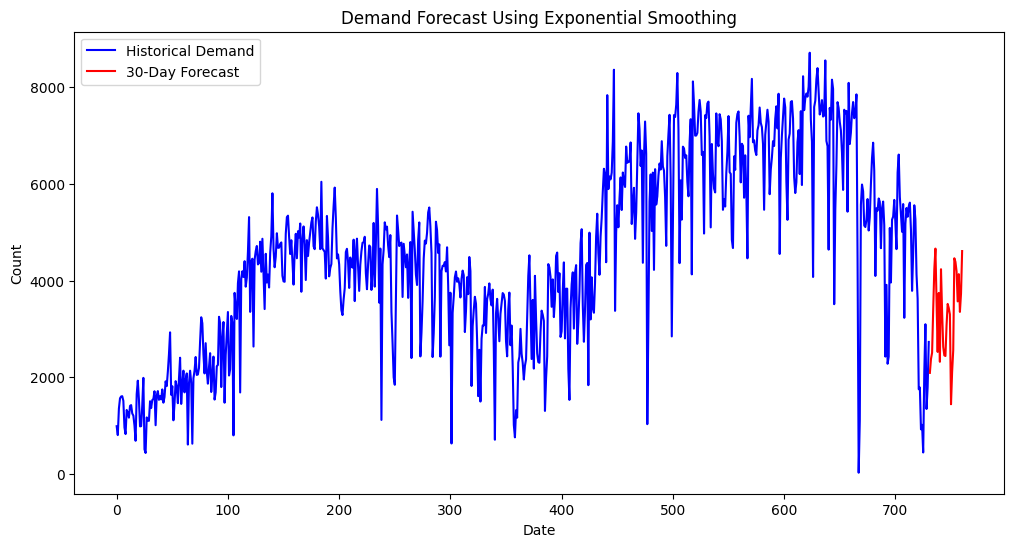

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(daily_demand['cnt'], trend='add', seasonal='add', seasonal_periods=365)
fit = model.fit()

forecast = fit.forecast(30)

plt.figure(figsize=(12, 6))
plt.plot(daily_demand['cnt'], label='Historical Demand', color='blue')
plt.plot(forecast, label='30-Day Forecast', color='red')
plt.title('Demand Forecast Using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

**Insight:**

The predicted demand analysis using Exponential Smoothing provides valuable insights into future sales trends, enabling businesses to optimize inventory management and enhance operational efficiency. By capturing the underlying patterns in historical demand data, this method highlights potential fluctuations in consumer preferences, seasonal effects, and market dynamics. The analysis reveals not only the expected demand levels but also the degree of uncertainty associated with those forecasts, allowing decision-makers to plan effectively for various scenarios. This proactive approach to demand forecasting helps in minimizing stockouts and excess inventory, ultimately contributing to improved customer satisfaction and reduced operational costs.

## Conclusion  

### 1. Key Factors Influencing Total Daily Bike Rentals  
The analysis reveals that **temperature** is a significant factor affecting bike rentals. As temperatures increase from **0°C to around 20°C**, the number of rentals rises steadily, peaking around this range. Beyond **20°C**, the growth plateaus, and no significant change in rentals is observed up to **35°C**.  

Additionally, weather conditions (though not explicitly analyzed in this dashboard) and the **type of day** (working day vs. holiday) likely play roles in influencing rentals. For example, a consistent rental volume (~4,500 on working days vs. ~4,300 on holidays) indicates a minor but noticeable preference for rentals on working days.  

### 2. Bike Rental Patterns and Peak Hours  
Rentals exhibit clear daily patterns, with distinct **peak hours** at:  
- **8 AM**: Likely due to commuters traveling to work or school.  
- **5 PM**: Aligning with the end of the workday or school hours.  

These times represent opportunities to ensure sufficient bike availability to meet peak demand. Conversely, off-peak times exhibit lower rental numbers, presenting an opportunity for system maintenance or promotional campaigns to boost usage during those periods.  

### 3. Impact of Working Days and Holidays on Bike Rentals  
Bike rentals on **working days** average approximately **4,500 rentals/day**, whereas holidays see slightly lower usage, averaging around **4,300 rentals/day**. This modest decline suggests that while working days drive slightly higher demand, holidays also sustain significant usage, potentially from recreational or tourist activities.  

---

## Recommendations  

### Operational Efficiency  
1. **Dynamic Fleet Distribution**:  
   Ensure that more bikes are available at key locations during peak hours (**8 AM** and **5 PM**) by dynamically reallocating bikes based on real-time usage data.  

2. **Temperature-Sensitive Maintenance**:  
   Since temperature significantly influences rentals, implement a preventive maintenance schedule during high-demand seasons (spring/summer) to reduce downtime and ensure operational efficiency.  

### Customer Satisfaction  
3. **Incentivize Off-Peak Rentals**:  
   Introduce discounts or loyalty programs for rentals during off-peak hours to balance demand and increase system utilization.  

4. **Enhanced User Experience**:  
   Provide real-time availability updates through a mobile app or digital kiosks, particularly at high-traffic locations during peak hours.  

### Revenue Growth Potential  
5. **Holiday-Specific Campaigns**:  
   Target holiday users with campaigns promoting scenic bike routes or group discounts, tapping into the recreational usage pattern.  

6. **Subscription Plans**:  
   Offer tiered subscription plans catering to frequent commuters, casual users, and holiday renters to increase consistent revenue streams.  

By focusing on these recommendations, the bike rental system can optimize resource allocation, improve customer satisfaction, and unlock new revenue opportunities, driving overall system efficiency and success.  